## What are the most demanded skills for the top 3 most popular data roles?
### Methodology
1. Clean-up skill column
2. Calculate skill count based on job_title_short
3. Calculate skill percentage
4. Plot final findings

In [341]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [342]:
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

In [343]:

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [344]:
from ast import literal_eval
for col in ['job_skills', 'job_type_skills']:
    df[col] = df[col].apply(lambda x : literal_eval(x) if pd.notna(x) else x)

In [345]:
df_india = df[df['job_country'] == 'India']

In [346]:
df_india_datadf_india_data = df[df['job_title_short'].apply(lambda x: 'data' in str(x).lower())]
india_data_top5 = df_india_data.value_counts('job_title_short').to_frame().head(5).reset_index()
india_data_top5_list = sorted(india_data_top5['job_title_short'].tolist())
#or df_india_data = df['job_title'].str.contains(pat = 'data', case=True, na=False, regex=True)
                    # pat → the pattern (string or regex) you want to search for.
                    # Example: 'Data' or 'Data|Analyst'.

                    # case → whether the search is case-sensitive.

                        # True → "Data" ≠ "data"

                        # False → "Data" matches "data", "DATA", etc.

                    # na → how to handle NaN values.

                        # False → treat NaN as not matching.

                        # True → treat NaN as matching.

                    # regex → whether pat should be treated as a regex.

                        # True → allows patterns like r'\bData\b' (word boundary).

                        # False → treats pat as a literal string. 

In [347]:
india_data_top5_list

['Data Analyst',
 'Data Engineer',
 'Data Scientist',
 'Senior Data Engineer',
 'Senior Data Scientist']

In [348]:
India_data_jobs_table = df_india_data[['job_title_short', 'job_skills']]

for job_title in india_data_top5_list:
    for job_title in India_data_jobs_table:
        India_data_jobs_table_explode_skills = India_data_jobs_table.explode('job_skills')


In [349]:
India_data_jobs_table_skills_count = India_data_jobs_table_explode_skills.groupby(['job_title_short','job_skills']).size().reset_index(name='count').sort_values(['job_title_short', 'count'], ascending=False)
# .value_counts().to_frame().reset_index().head(5)
India_data_jobs_table_skills_count

,job_title_short,job_skills,count
1282,Senior Data Scientist,python,25915
1317,Senior Data Scientist,sql,18605
1286,Senior Data Scientist,r,12724
1157,Senior Data Scientist,aws,7448
1312,Senior Data Scientist,spark,6617
...,...,...,...
79,Data Analyst,gtx,1
117,Data Analyst,msaccess,1
131,Data Analyst,nuxt.js,1
137,Data Analyst,ovh,1


In [350]:
Total_jobs = df_india_data['job_title_short'].value_counts().reset_index(name ='Total_jobs')

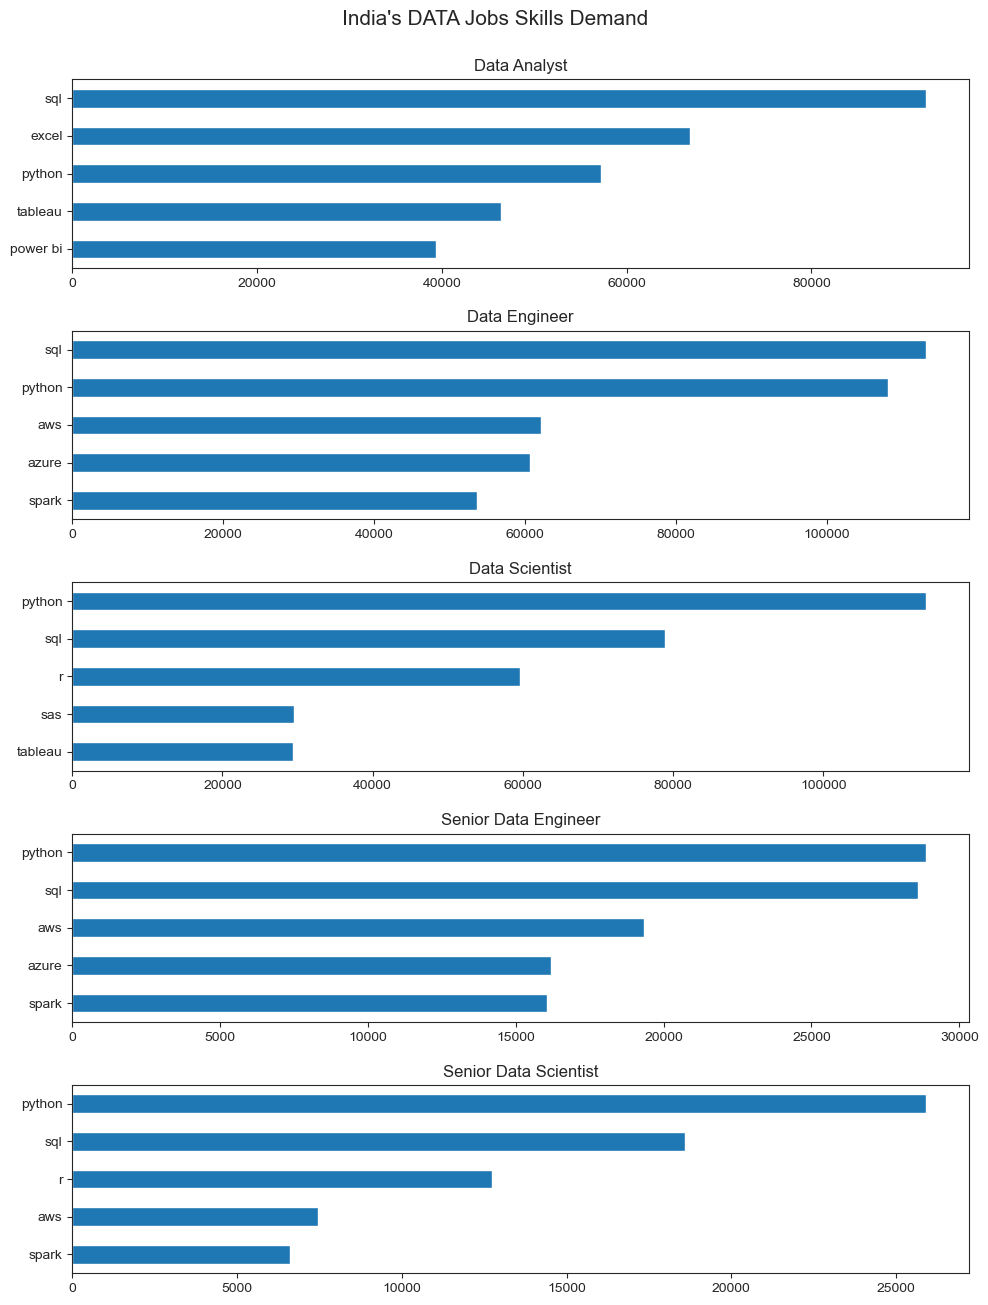

In [ ]:
fig, ax = plt.subplots(len(india_data_top5_list), 1, figsize = (10, 13))

# sns.set_style('ticks')

for i, job_short_title in enumerate(india_data_top5_list):
    df_plot = India_data_jobs_table_skills_count[India_data_jobs_table_skills_count['job_title_short'] == job_short_title].head(5)
    df_plot.plot(kind = 'barh', y = 'count', x ='job_skills', ax = ax[i], title = job_short_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('India\'s DATA Jobs Skills Demand', fontsize = 15, y = 1)
fig.tight_layout(h_pad = 1.5)
plt.show()

In [351]:
India_data_jobs_table_skills_perc = pd.merge(India_data_jobs_table_skills_count, Total_jobs, how = 'left', on= 'job_title_short')
India_data_jobs_table_skills_perc['percentage'] = India_data_jobs_table_skills_perc['count']/India_data_jobs_table_skills_perc['Total_jobs'] *100
India_data_jobs_table_skills_perc

,job_title_short,job_skills,count,Total_jobs,percentage
0,Senior Data Scientist,python,25915,36957,70.122034
1,Senior Data Scientist,sql,18605,36957,50.342290
2,Senior Data Scientist,r,12724,36957,34.429202
3,Senior Data Scientist,aws,7448,36957,20.153151
4,Senior Data Scientist,spark,6617,36957,17.904592
...,...,...,...,...,...
1354,Data Analyst,gtx,1,196075,0.000510
1355,Data Analyst,msaccess,1,196075,0.000510
1356,Data Analyst,nuxt.js,1,196075,0.000510
1357,Data Analyst,ovh,1,196075,0.000510


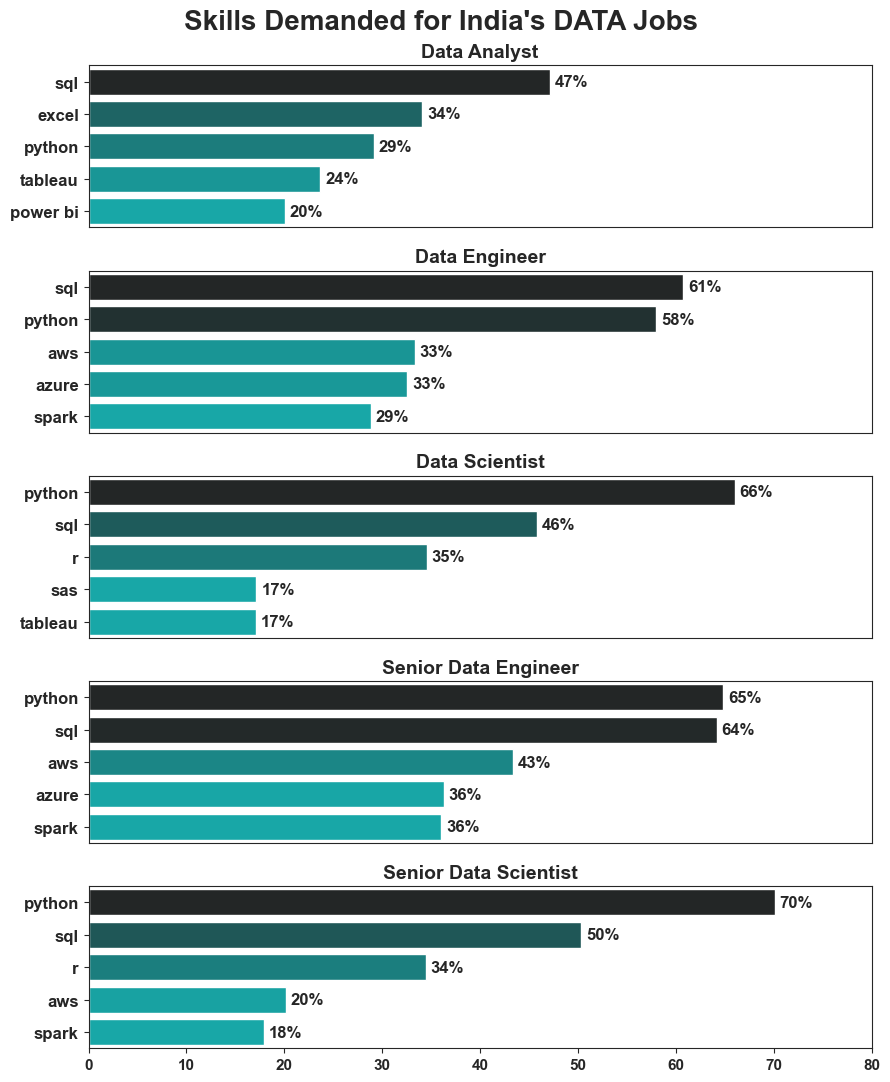

In [397]:
fig, ax = plt.subplots(len(india_data_top5_list), 1, figsize = (9, 11))

# sns.set_style('ticks')

for i, job_short_title in enumerate(india_data_top5_list):
    df_plot = India_data_jobs_table_skills_perc[India_data_jobs_table_skills_perc['job_title_short'] == job_short_title].head(5)
    sns.barplot(data = df_plot, x = 'percentage', y = 'job_skills', ax = ax[i], palette= 'dark:c_r', hue = 'percentage', legend = False)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_title(job_short_title, fontsize=14, fontweight='bold')
    ax[i].set_xlim(0, 80)

    for n, v in enumerate(df_plot['percentage']):
        ax[i].text(v+0.5, n, f'{v:.0f}%', va = 'center', fontsize=12, fontweight='bold')

    # Make skill names (y-axis labels) bold and larger
    ax[i].tick_params(axis='y', labelsize=12)
    for label in ax[i].get_yticklabels():
        label.set_fontweight('bold')

    if i != len(india_data_top5_list) - 1:
        ax[i].set_xticks([])
    else:
    # Make x-axis labels bold for the last subplot
        ax[i].tick_params(axis='x', labelsize=11)
        for label in ax[i].get_xticklabels():
            label.set_fontweight('bold')

fig.suptitle('Skills Demanded for India\'s DATA Jobs ', fontsize = 20, fontweight='bold')
fig.tight_layout(h_pad = 1.5)
plt.show()